In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import torchvision
from torchvision import transforms
import torch
import time
import matplotlib.cm as cm

In [2]:
%cd ./Swin-Transformer

D:\ProgramData\JupyterNB\Project\Swin-Transformer


In [3]:
img_size = 128
num_channels = 3

In [4]:
img_transform = transforms.Compose(
        [transforms.ToTensor(),
         #transforms.Grayscale(),
         transforms.Resize([img_size, img_size]),
        ])

img_transform2 = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Grayscale(),
         transforms.Resize([img_size, img_size]),
        ])

imagenette_train = torchvision.datasets.ImageFolder("./imagewoof2_320/train",transform=img_transform)
imagenette_val = torchvision.datasets.ImageFolder("./imagewoof2_320/val",transform=img_transform)

imagenette_train2 = torchvision.datasets.ImageFolder("./imagewoof2_320/train",transform=img_transform2)
imagenette_val2 = torchvision.datasets.ImageFolder("./imagewoof2_320/val",transform=img_transform2)

In [5]:
len(imagenette_train2.imgs)

9025

In [6]:
len(imagenette_val2.imgs)

3929

In [11]:
imagewoof_train = torchvision.datasets.ImageFolder("./imagewoof2_320/train",transform=img_transform)
imagewoof_val = torchvision.datasets.ImageFolder("./imagewoof2_320/val",transform=img_transform)
imagewoof_train2 = torchvision.datasets.ImageFolder("./imagewoof2_320/train",transform=img_transform2)
imagewoof_val2 = torchvision.datasets.ImageFolder("./imagewoof2_320/val",transform=img_transform2)

In [12]:
num_train_imgs = (len(imagenette_train.imgs))
num_val_imgs = (len(imagenette_val.imgs))

num_train_imgs_w = (len(imagewoof_train.imgs))
num_val_imgs_w = (len(imagewoof_val.imgs))

In [13]:
num_train_imgs_w, num_val_imgs_w 

(9025, 3929)

In [8]:
train_loader = torch.utils.data.DataLoader(imagenette_train,
                                          batch_size=num_train_imgs,
                                          shuffle=True,
                                          num_workers=4,
                                          drop_last=True
                                          )
val_loader = torch.utils.data.DataLoader(imagenette_val,
                                          batch_size=num_val_imgs,
                                          shuffle=True,
                                          num_workers=4,
                                          drop_last=True
                                          )

In [59]:
train_loader_gray= torch.utils.data.DataLoader(imagenette_train2,
                                          batch_size=num_train_imgs,
                                          shuffle=True,
                                          num_workers=4,
                                          drop_last=True
                                          )
val_loader_gray = torch.utils.data.DataLoader(imagenette_val2,
                                          batch_size=num_val_imgs,
                                          shuffle=True,
                                          num_workers=4,
                                          drop_last=True
                                          )

In [15]:
train_loader2 = torch.utils.data.DataLoader(imagewoof_train,
                                          batch_size=num_train_imgs_w,
                                          shuffle=True,
                                          num_workers=4,
                                          drop_last=True
                                          )
val_loader2 = torch.utils.data.DataLoader(imagewoof_val,
                                          batch_size=num_val_imgs_w,
                                          shuffle=True,
                                          num_workers=4,
                                          drop_last=True
                                          )

train_loader2_gray= torch.utils.data.DataLoader(imagewoof_train2,
                                          batch_size=num_train_imgs_w,
                                          shuffle=True,
                                          num_workers=4,
                                          drop_last=True
                                          )
val_loader2_gray = torch.utils.data.DataLoader(imagewoof_val2,
                                          batch_size=num_val_imgs_w,
                                          shuffle=True,
                                          num_workers=4,
                                          drop_last=True
                                          )

In [89]:
t1=time.time()
X_train,Y_train = next(iter(train_loader_gray))
X_train = X_train.numpy()
Y_train = Y_train.numpy()
X_train.shape
train_time = t1-time.time()

In [11]:
woof_labels = ['Shih-Tzu','Rhodesian ridgeback','Beagle','English foxhound','Australian terrier','Border terrier','Golden retriever','Old English sheepdog','Samoyed',
'Dingo']
nette_labels =["Tench","English springer","Cassette player","chain saw","church","French horn","garbage truck","gas pump","golf ball","parachute"]

In [15]:
X_train.shape

NameError: name 'X_train' is not defined

In [22]:
imagenette_train.classes

['n02086240',
 'n02087394',
 'n02088364',
 'n02089973',
 'n02093754',
 'n02096294',
 'n02099601',
 'n02105641',
 'n02111889',
 'n02115641']

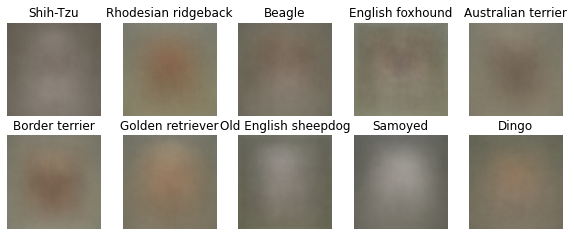

In [83]:
fig10 = plt.figure(figsize = (10, 10))
d = 0
for r in range(2):
  for c in range(5):
    fig10.add_subplot(5, 5, d+1)
    idx = np.where(Y_train==d)
    class_mean = np.mean(X_train[idx],axis=0)
    plt.imshow(class_mean.transpose([1,2,0]))
    plt.axis('off')
    plt.title(label = woof_labels[d], color = 'black')
    d = d+1

In [47]:
X_train2 = X_train2.reshape(-1,64*64)

In [94]:
X_train = X_train.reshape(-1,64*64)

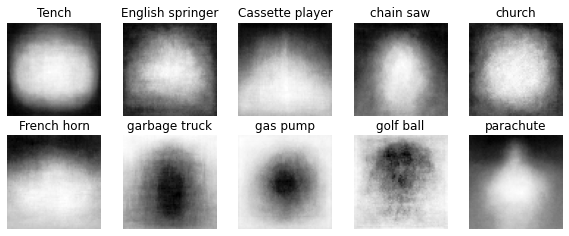

In [113]:
fig11 = plt.figure(figsize = (10, 10))
d = 0
for r in range(2):
  for c in range(5):
    fig11.add_subplot(5, 5, d+1)
    idx = np.where(Y_train==d)
    class_mean = np.mean(X_train[idx],axis=0)
    X_svd = X_train[idx]-class_mean
    U,S,V = np.linalg.svd(X_svd)
    plt.imshow(V[0].reshape(64,64),cmap = cm.Greys_r)
    plt.axis('off')
    plt.title(label = nette_labels[d], color = 'black')
    d = d+1

In [107]:
X_train.min()

-0.5301149

In [96]:
U,S,V = np.linalg.svd(X_train[idx])

In [10]:
X_val,Y_val = next(iter(val_loader))
X_val = X_val.numpy()
Y_val = Y_val.numpy()

Imagewoof

In [23]:

X_train2,Y_train2 = next(iter(train_loader2))
X_train2 = X_train2.numpy()
Y_train2 = Y_train2.numpy()
X_train2.shape


(9025, 3, 128, 128)

In [24]:
X_val2,Y_val2 = next(iter(val_loader2))
X_val2 = X_val2.numpy()
Y_val2 = Y_val2.numpy()

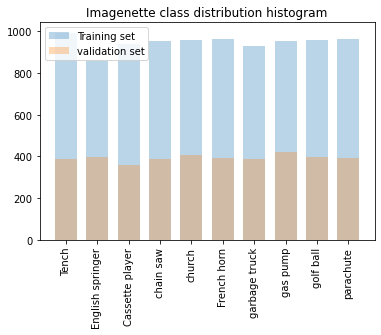

In [63]:

plt.hist(Y_train, bins = np.arange(11)-0.5,alpha= 0.3,density = False,label="Training set",rwidth = 0.7)
plt.hist(Y_val, bins = np.arange(11)-0.5, alpha= 0.3 ,density = False,label= "validation set",rwidth = 0.7)
plt.title("Imagenette class distribution histogram")
plt.xticks(np.arange(10),nette_labels,rotation=90)
plt.legend()
plt.show()

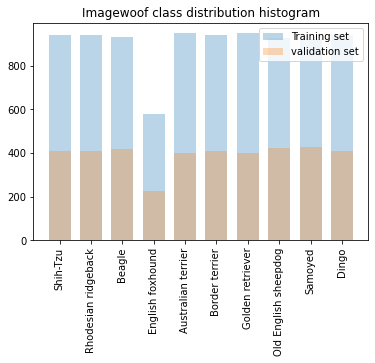

In [64]:

plt.hist(Y_train2, bins = np.arange(11)-0.5,alpha= 0.3,density = False,label="Training set",rwidth = 0.7)
plt.hist(Y_val2, bins = np.arange(11)-0.5, alpha= 0.3 ,density = False,label= "validation set",rwidth = 0.7)
plt.title("Imagewoof class distribution histogram")
plt.xticks(np.arange(10),woof_labels,rotation=90)
plt.legend()
plt.show()

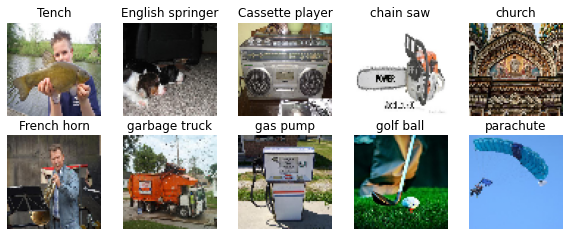

In [74]:
fig10 = plt.figure(figsize = (10, 10))
d = 0
for r in range(2):
  for c in range(5):
    fig10.add_subplot(5, 5, d+1)
    idx = np.where(Y_train==d)[0][0]
    plt.imshow(X_train[idx].transpose([1,2,0]))
    plt.axis('off')
    plt.title(label = nette_labels[d], color = 'black')
    d = d+1  

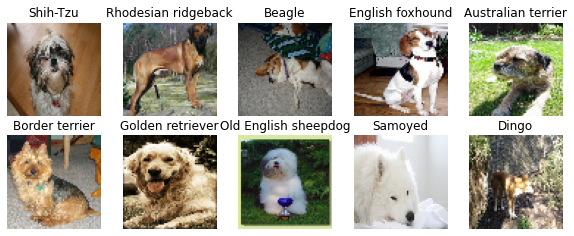

In [71]:
fig10 = plt.figure(figsize = (10, 10))
d = 0
for r in range(5):
  for c in range(2):
    fig10.add_subplot(5, 5, d+1)
    idx = np.where(Y_train2==d)[0][0]
    plt.imshow(X_train2[idx].transpose([1,2,0]))
    plt.axis('off')
    plt.title(label = woof_labels[d], color = 'black')
    d = d+1  

In [25]:
"""X_train = X_train.reshape(-1,img_size*img_size*num_channels)
X_val = X_val.reshape(-1,img_size*img_size*num_channels)"""
X_train2 = X_train2.reshape(-1,img_size*img_size*num_channels)
X_val2 = X_val2.reshape(-1,img_size*img_size*num_channels)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [29]:
times = []
acc_scores = []
val_scores = []

for i in range(10):
    t1 = time.time()
    clf = RandomForestClassifier(max_depth=i+1, random_state=0)
    clf.fit(X_train2, Y_train2)
    
    acc_scores.append( clf.score(X_train2,Y_train2))
    val_scores.append(clf.score(X_val2,Y_val2))
    t2 = time.time()-t1
    times.append(t2)
    

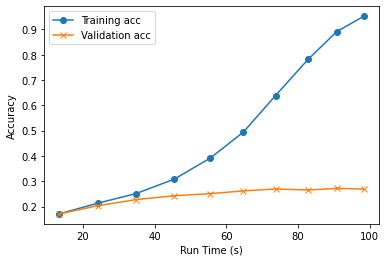

In [30]:
plt.plot(times,acc_scores,label = "Training acc",marker = 'o')
plt.plot(times,val_scores,label = "Validation acc",marker = 'x')
plt.ylabel("Accuracy")
plt.xlabel("Run Time (s)")
plt.legend()

In [31]:
val_scores

[0.17129040468312548,
 0.20412318656146602,
 0.22779333163654875,
 0.2430643929753118,
 0.25146347671163144,
 0.2621532196487656,
 0.2697887503181471,
 0.26571646729447695,
 0.2720794095189616,
 0.2695342326291677]

In [33]:
acc_scores

[0.17185595567867035,
 0.21385041551246536,
 0.25163434903047094,
 0.30880886426592796,
 0.3918005540166205,
 0.494404432132964,
 0.6385595567867036,
 0.7810526315789473,
 0.8913019390581718,
 0.9516897506925208]

In [29]:
clf.score(X_val2,Y_val2)

0.24942733519979637

In [81]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

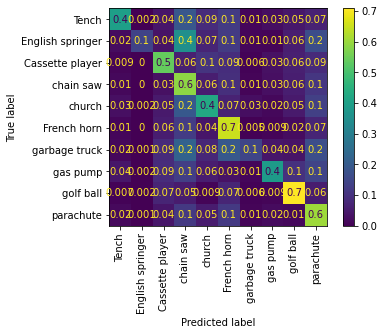

In [82]:
X_train_pred = clf.predict(X_train)
train_cm = confusion_matrix(Xtrain_pred,Y_train)

ConfusionMatrixDisplay.from_predictions(Y_train,X_train_pred,xticks_rotation = 'vertical', normalize = 'true',display_labels = nette_labels,values_format='.1g')

In [42]:
clf2 = RandomForestClassifier(max_depth=6, random_state=0)
clf2.fit(X_train2, Y_train2)

RandomForestClassifier(max_depth=6, random_state=0)

In [43]:
clf2.score(X_train2,Y_train2)

0.5038227146814405

In [44]:
clf2.score(X_val2,Y_val2)

0.25502672435734286

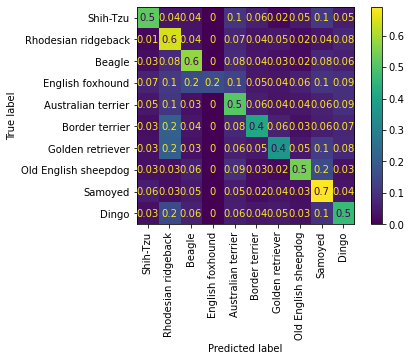

In [76]:
X_train_pred2 = clf2.predict(X_train2)
train_cm2 = confusion_matrix(X_train_pred2,Y_train2)

ConfusionMatrixDisplay.from_predictions(Y_train2,X_train_pred2,xticks_rotation = 'vertical', normalize = 'true',display_labels = woof_labels,values_format='.1g')

In [75]:
np.sum(X_train_pred2 == 2)

971